<a href="https://colab.research.google.com/github/ucfilho/marquesgabi_abril_2020/blob/master/01_Features_Mahotas_Completo_Avalia_mar_20_2020.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install mahotas

     |████████████████████████████████| 1.5MB 10.9MB/s 
  Created wheel for mahotas: filename=mahotas-1.4.9-cp36-cp36m-linux_x86_64.whl size=4265650 sha256=a552e08c7ddab0888b617f4131a2a5fca2fb3f0093d17f760d9c416b058ae5bc
  Stored in directory: /root/.cache/pip/wheels/02/e7/50/b67eee3b19c479cc5b41f10230bf9c1556be6eaaf095c6e997
Successfully built mahotas


In [2]:
!git clone https://github.com/ucfilho/marquesgabi_fev_2020 #clonar do Github
%cd marquesgabi_fev_2020
import Go2BlackWhite
import Go2Mahotas


Cloning into 'marquesgabi_fev_2020'...
remote: Enumerating objects: 73, done.
remote: Counting objects: 100% (73/73), done.
remote: Compressing objects: 100% (71/71), done.
remote: Total 73 (delta 37), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (73/73), done.
/content/marquesgabi_fev_2020


In [0]:
#farei para 720 fotos (metade 2= Grao) e (metade nao grao=1)

In [4]:

!git clone https://github.com/marquesgabi/Doutorado
%cd Doutorado

Cloning into 'Doutorado'...
remote: Enumerating objects: 76, done.
remote: Counting objects: 100% (76/76), done.
remote: Compressing objects: 100% (76/76), done.
remote: Total 223 (delta 33), reused 0 (delta 0), pack-reused 147
Receiving objects: 100% (223/223), 87.41 MiB | 5.98 MiB/s, done.
Resolving deltas: 100% (102/102), done.
/content/marquesgabi_fev_2020/Doutorado


In [0]:
import numpy as np
import cv2
from skimage import data
import matplotlib.pyplot as plt
import matplotlib
import pandas as pd
from skimage import io, util
import mahotas.features.texture as mht
import mahotas.features
import os 
import zipfile
from skimage import filters
from skimage import exposure
import skimage.feature as sk
from google.colab import files
from numpy import linalg as LA
from scipy.signal import find_peaks
from scipy.signal import peak_prominences
from scipy.signal import peak_widths
from scipy.integrate import simps
import re
import Go2BlackWhite
%matplotlib inline

In [0]:
Size=20 # tamanho da foto
Sub_Size=int(Size/5) # tamanho do fracionamento
Row_Crop=1/2 # posicao do corte
Crop=int(Size*Row_Crop)
Propriedade='contrast' # escolher uma propriedade para o cálcul0 dos picos e outras informações

In [0]:
Transfere='Fotos9Amostras720.zip'
file_name = zipfile.ZipFile(Transfere, 'r')
file_name.extractall()

In [0]:
Prop=Propriedade

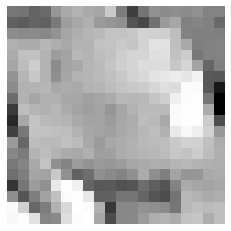

In [9]:
ww,img_name=Go2BlackWhite.BlackWhite(Transfere,Size)
plt.axis("off")
plt.imshow(ww[10], cmap = "gray")

In [10]:
Num,Row,Col=np.asarray(ww).shape
Idx=[]
New_Colunm=[]

for i in range(Num):
  Media=np.mean(ww[i])
  k=np.where(ww[i].ravel() > Media)
  Idx.append(np.asarray(k).ravel())

Quant=Size*Size
for i in Idx:
  #print(i)
  New_Colunm.append(len(i)/Quant)
print(New_Colunm)

[0.4125, 0.41, 0.4225, 0.53, 0.49, 0.38, 0.405, 0.4125, 0.41, 0.53, 0.5775, 0.4675, 0.4675, 0.5, 0.51, 0.53, 0.4775, 0.5275, 0.4825, 0.495, 0.5525, 0.48, 0.5275, 0.4325, 0.4575, 0.5475, 0.56, 0.535, 0.5, 0.51, 0.525, 0.44, 0.435, 0.5125, 0.565, 0.5075, 0.485, 0.4825, 0.3775, 0.5275, 0.5475, 0.5325, 0.4275, 0.41, 0.5175, 0.5225, 0.44, 0.4375, 0.395, 0.535, 0.555, 0.4825, 0.4325, 0.4625, 0.4525, 0.495, 0.4925, 0.3625, 0.375, 0.355, 0.4075, 0.405, 0.465, 0.4575, 0.4725, 0.4825, 0.4375, 0.585, 0.57, 0.4425, 0.4025, 0.45, 0.4625, 0.615, 0.5575, 0.5325, 0.4675, 0.45, 0.4525, 0.4625, 0.525, 0.4625, 0.525, 0.455, 0.4775, 0.3875, 0.4175, 0.33, 0.33, 0.3675, 0.41, 0.5, 0.53, 0.4875, 0.47, 0.54, 0.5625, 0.41, 0.5125, 0.405, 0.6125, 0.5575, 0.5075, 0.4025, 0.4875, 0.4975, 0.5575, 0.4825, 0.4575, 0.43, 0.45, 0.41, 0.435, 0.505, 0.5325, 0.46, 0.39, 0.485, 0.39, 0.58, 0.5, 0.6275, 0.49, 0.5425, 0.4325, 0.4625, 0.6575, 0.5325, 0.4125, 0.4475, 0.48, 0.4725, 0.39, 0.435, 0.3625, 0.3675, 0.4825, 0.475, 0

In [11]:
print(len(img_name))

720


In [0]:
# ww contain all photos in black and white
ww,img_name=Go2BlackWhite.BlackWhite(Transfere,Size)

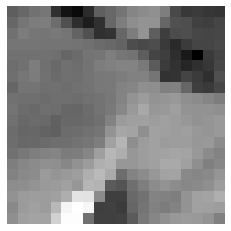

In [13]:
plt.axis("off")
plt.imshow(ww[539], cmap = "gray")

In [14]:
print(img_name)

['Q6-2-1-B1.jpg', 'Q6-2-1-B2.jpg', 'Q6-2-1-B3.jpg', 'Q6-2-1-B5.jpg', 'Q6-2-1-B6.jpg', 'Q6-2-1-B7.jpg', 'Q6-2-1-B8.jpg', 'Q6-2-1-B9.jpg', 'Q6-2-1-B10.jpg', 'Q6-2-1-G1.jpg', 'Q6-2-1-G2.jpg', 'Q6-2-1-G3.jpg', 'Q6-2-1-G4.jpg', 'Q6-2-1-G5.jpg', 'Q6-2-1-G6.jpg', 'Q6-2-1-G7.jpg', 'Q6-2-1-G9.jpg', 'Q6-2-1-G10.jpg', 'Q6-2-1-B4.jpg', 'Q6-2-1-I1.jpg', 'Q6-2-1-I2.jpg', 'Q6-2-1-I3.jpg', 'Q6-2-1-I4.jpg', 'Q6-2-1-I5.jpg', 'Q6-2-1-I6.jpg', 'Q6-2-1-I7.jpg', 'Q6-2-1-I8.jpg', 'Q6-2-1-I9.jpg', 'Q6-2-1-I10.jpg', 'Q6-2-2-B1.jpg', 'Q6-2-2-B2.jpg', 'Q6-2-2-B3.jpg', 'Q6-2-2-B4.jpg', 'Q6-2-2-B5.jpg', 'Q6-2-2-B7.jpg', 'Q6-2-2-B8.jpg', 'Q6-2-2-B9.jpg', 'Q6-2-2-B10.jpg', 'Q6-2-2-G1.jpg', 'Q6-2-2-G2.jpg', 'Q6-2-2-G3.jpg', 'Q6-2-2-G4.jpg', 'Q6-2-2-G6.jpg', 'Q6-2-2-G7.jpg', 'Q6-2-2-G8.jpg', 'Q6-2-2-G9.jpg', 'Q6-2-2-G10.jpg', 'Q6-2-2-I1.jpg', 'Q6-2-2-I2.jpg', 'Q6-2-2-I3.jpg', 'Q6-2-2-I4.jpg', 'Q6-2-2-I5.jpg', 'Q6-2-2-I6.jpg', 'Q6-2-2-I7.jpg', 'Q6-2-2-I8.jpg', 'Q6-2-2-I9.jpg', 'Q6-2-2-I10.jpg', 'Q6-3-1-B1.jpg', 'Q6-3-1

In [0]:
# Find the list elements starting with specific letter
subs = 'B'
Buraco = [x for x in img_name if re.search(subs, x)] 
subs = 'G'
Grao = [x for x in img_name if re.search(subs, x)] 
subs = 'I'
Indef = [x for x in img_name if re.search(subs, x)] 

In [16]:
print(Buraco)
print(Grao)
print(Indef)

['Q6-2-1-B1.jpg', 'Q6-2-1-B2.jpg', 'Q6-2-1-B3.jpg', 'Q6-2-1-B5.jpg', 'Q6-2-1-B6.jpg', 'Q6-2-1-B7.jpg', 'Q6-2-1-B8.jpg', 'Q6-2-1-B9.jpg', 'Q6-2-1-B10.jpg', 'Q6-2-1-B4.jpg', 'Q6-2-2-B1.jpg', 'Q6-2-2-B2.jpg', 'Q6-2-2-B3.jpg', 'Q6-2-2-B4.jpg', 'Q6-2-2-B5.jpg', 'Q6-2-2-B7.jpg', 'Q6-2-2-B8.jpg', 'Q6-2-2-B9.jpg', 'Q6-2-2-B10.jpg', 'Q6-3-1-B1.jpg', 'Q6-3-1-B2.jpg', 'Q6-3-1-B3.jpg', 'Q6-3-1-B4.jpg', 'Q6-3-1-B5.jpg', 'Q6-3-1-B6.jpg', 'Q6-3-1-B7.jpg', 'Q6-3-1-B8.jpg', 'Q6-3-1-B9.jpg', 'Q6-3-1-B10.jpg', 'Q6-3-2-B1.jpg', 'Q6-3-2-B3.jpg', 'Q6-3-2-B4.jpg', 'Q6-3-2-B5.jpg', 'Q6-3-2-B6.jpg', 'Q6-3-2-B7.jpg', 'Q6-3-2-B8.jpg', 'Q6-3-2-B9.jpg', 'Q6-3-2-B10.jpg', 'Q6-3-2-B2.jpg', 'Q6-2-2-B6.jpg', 'Q6-1-4-B1.jpg', 'Q6-1-4-B2.jpg', 'Q6-1-4-B3.jpg', 'Q6-1-4-B4.jpg', 'Q6-1-4-B5.jpg', 'Q6-1-4-B6.jpg', 'Q6-1-4-B7.jpg', 'Q6-1-4-B8.jpg', 'Q6-1-4-B9.jpg', 'Q6-1-4-B10.jpg', 'Q6-1-5-B1.jpg', 'Q6-1-5-B2.jpg', 'Q6-1-5-B3.jpg', 'Q6-1-5-B4.jpg', 'Q6-1-5-B5.jpg', 'Q6-1-5-B6.jpg', 'Q6-1-5-B7.jpg', 'Q6-1-5-B8.jpg', 'Q6-1-5-

In [17]:
# find df texture for a given picture
df=Go2Mahotas.Mahotas(ww[0],Size,Sub_Size,Crop,img_name)   # gotoMahotas junta Mahotas com outros calculos
print(df)

         ASM   constrast    correl  ...  dif entropy      IMC1      IMC2
0   0.049479  289.777778  0.440100  ...     2.958939 -0.799012  0.998434
1   0.049479  253.722222  0.276894  ...     3.139495 -0.792832  0.998312
2   0.049479  282.965278  0.069079  ...     3.167272 -0.786678  0.998161
3   0.050154  248.562500 -0.043561  ...     2.967586 -0.774901  0.997908
4   0.051890  113.291667  0.161531  ...     2.847828 -0.664940  0.992825
5   0.060185   16.750000  0.182047  ...     2.691374 -0.514648  0.969636
6   0.062114   15.604167  0.303923  ...     2.554052 -0.517851  0.969889
7   0.068673   15.291667 -0.022397  ...     2.290163 -0.512844  0.966240
8   0.074749   13.840278  0.020994  ...     2.362769 -0.483659  0.953700
9   0.071759   11.402778 -0.180992  ...     2.317941 -0.431176  0.934115
10  0.065394    7.527778 -0.114815  ...     2.209991 -0.449911  0.935752
11  0.059317   26.715278  0.349715  ...     2.487769 -0.678333  0.992723
12  0.053627   36.430556  0.522956  ...     2.88949

In [18]:
Nomes=list(df.columns)
Nomes_2=[]
for it in Nomes:
  Nomes_2.append(it)
Nomes_2.append('colors') # vai adicionar as variaveis novas 
# caso queria adicionar outra variavel alem de cor, tem que modificar
# a lista Nomes_2 com a adicao do nome da variavel a ser adicionada
print(Nomes_2)

['ASM', 'constrast', 'correl', 'variance', 'inv diff mom', 'sum aveg', 'sum var', 'sum entropy', 'entropy', 'dif var', 'dif entropy', 'IMC1', 'IMC2', 'colors']


In [0]:
#print(Nomes)

In [20]:
print(len(df['ASM']))

17


In [21]:
# observacao: cuidado para nao confundir Buracos com Buraco
#             cuidado para nao confundir Graos com Grao
#             cuidado para nao confundir Indefs com Indef

j=0
cont=-1
Posicao_Buraco=[]
Buracos=[]
for i in img_name:
  cont=cont+1
  for k in Buraco:
    if(i==k):
      Posicao_Buraco.append(cont)
      Buracos.append(4) # Buracos.append(1)
j=0
cont=-1
Posicao_Grao=[]
Graos=[]
for i in img_name:
  cont=cont+1
  for k in Grao:
    if(i==k):
      Posicao_Grao.append(cont)
      Graos.append(5) # Graos.append(2)

j=0
cont=-1
Posicao_Indef=[]
Indefs=[]
for i in img_name:
  cont=cont+1
  for k in Indef:
    if(i==k):
      Posicao_Indef.append(cont)
      Indefs.append(9) # Indefs.append(3)

print(Posicao_Grao)
print(Posicao_Buraco)
print(Posicao_Indef)

[9, 10, 11, 12, 13, 14, 15, 16, 17, 38, 39, 40, 41, 42, 43, 44, 45, 46, 67, 68, 69, 70, 71, 72, 73, 74, 75, 84, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 117, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 240, 241, 242, 243, 244, 245, 246, 247, 248, 249, 270, 271, 272, 273, 274, 275, 276, 277, 278, 279, 300, 301, 302, 303, 304, 305, 306, 307, 308, 309, 330, 331, 332, 333, 334, 335, 336, 337, 338, 339, 360, 361, 362, 363, 364, 365, 366, 367, 368, 369, 390, 391, 392, 393, 394, 395, 396, 397, 398, 399, 420, 421, 422, 423, 424, 425, 426, 427, 428, 429, 450, 451, 452, 453, 454, 455, 456, 457, 458, 459, 480, 481, 482, 483, 484, 485, 486, 487, 488, 489, 510, 511, 512, 513, 514, 515, 516, 517, 518, 519, 540, 541, 542, 543, 544, 545, 546, 547, 548, 549, 550, 551, 552, 553, 554, 555, 556, 557, 558, 559, 560, 561, 562, 563, 564, 565, 5

In [0]:
#for i in range(len(Posicao_Buraco)):
#for i in Posicao_Buraco:
#  print(i)

In [0]:
# compara constrast dos tres primeiros buracos

Matriz_X_Buraco=[] #é a matriz com as 14 variaveis (mahotas+cor) para todas as fotos de buraco

for k in Posicao_Buraco:
  df=Go2Mahotas.Mahotas(ww[k],Size,Sub_Size,Crop,img_name)
  Linha=[]
  for it in Nomes:
    #print(Linha)
    #print("Nomes=",Nomes)
    #print("it=",it)
    #print(df[it])
    Linha.append(np.mean(df[it]))

  Linha.append(New_Colunm[k])
  Matriz_X_Buraco.append(Linha)
  #plt.figure(i+1)
  #plt.plot(df['constrast'])
  #print(len(Matriz_X_Buraco))
#print(pd.DataFrame(Matriz_X_Buraco)) 
#Contraste_Buraco=pd.DataFrame(Matriz_X_Buraco,columns=Nomes)
Contraste_Buraco=pd.DataFrame(Matriz_X_Buraco,columns=Nomes_2) #é a matriz com as 14 variaveis (mahotas+cor) para todas as fotos de buraco, com os nomes do Índice

In [24]:
# Insert the new column at position 1.
Contraste_Buraco.insert(0,"Type",1,True)
print(Contraste_Buraco)

     Type       ASM   constrast  ...      IMC1      IMC2  colors
0       1  0.057660   93.163399  ... -0.641415  0.981016  0.4125
1       1  0.050126  402.455882  ... -0.799590  0.998222  0.4100
2       1  0.052866  154.894608  ... -0.740076  0.995090  0.4225
3       1  0.050115  397.558007  ... -0.781537  0.997694  0.5300
4       1  0.054080  108.011438  ... -0.723026  0.994235  0.4900
..    ...       ...         ...  ...       ...       ...     ...
175     1  0.053672  364.052288  ... -0.730844  0.992383  0.4875
176     1  0.056685   94.662582  ... -0.673195  0.989868  0.4475
177     1  0.062500  220.456291  ... -0.663729  0.985292  0.5700
178     1  0.051437  196.939542  ... -0.770135  0.997371  0.5350
179     1  0.060991   40.850899  ... -0.644060  0.986982  0.3850

[180 rows x 15 columns]


In [0]:
# compara constrast dos graos

Matriz_X_Grao=[] #é a matriz com as 14 variaveis (mahotas+cor) para todas as fotos de grao

for k in Posicao_Grao:
  df=Go2Mahotas.Mahotas(ww[k],Size,Sub_Size,Crop,img_name)
  Linha=[]
  for it in Nomes:
    Linha.append(np.mean(df[it]))
    
  Linha.append(New_Colunm[k])
  Matriz_X_Grao.append(Linha)
#print(pd.DataFrame(Matriz_X_Grao))

Contraste_Grao=pd.DataFrame(Matriz_X_Grao,columns=Nomes_2) #é a matriz com as 14 variaveis (mahotas+cor) para todas as fotos de grao, com os nomes do Índice

In [26]:
# Insert the new column at position 1.
Contraste_Grao.insert(0,"Type",2,True)
print(Contraste_Grao)

     Type       ASM    constrast  ...      IMC1      IMC2  colors
0       2  0.049178  1150.217729  ... -0.838216  0.999035  0.5300
1       2  0.051368   441.850899  ... -0.753394  0.996884  0.5775
2       2  0.051771   654.863562  ... -0.771971  0.996772  0.4675
3       2  0.050886  4923.803513  ... -0.789735  0.997711  0.4675
4       2  0.052248   471.955474  ... -0.748800  0.995720  0.5000
..    ...       ...          ...  ...       ...       ...     ...
355     2  0.059062   185.276144  ... -0.673529  0.989175  0.4625
356     2  0.065484    88.034314  ... -0.638832  0.983103  0.5825
357     2  0.065036    29.092729  ... -0.636106  0.978040  0.6250
358     2  0.051766   563.948121  ... -0.779659  0.997217  0.4850
359     2  0.052254   405.430964  ... -0.758353  0.996727  0.5575

[360 rows x 15 columns]


In [27]:
print(Posicao_Grao)
print(Posicao_Buraco)
print(Posicao_Indef)

[9, 10, 11, 12, 13, 14, 15, 16, 17, 38, 39, 40, 41, 42, 43, 44, 45, 46, 67, 68, 69, 70, 71, 72, 73, 74, 75, 84, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 117, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 240, 241, 242, 243, 244, 245, 246, 247, 248, 249, 270, 271, 272, 273, 274, 275, 276, 277, 278, 279, 300, 301, 302, 303, 304, 305, 306, 307, 308, 309, 330, 331, 332, 333, 334, 335, 336, 337, 338, 339, 360, 361, 362, 363, 364, 365, 366, 367, 368, 369, 390, 391, 392, 393, 394, 395, 396, 397, 398, 399, 420, 421, 422, 423, 424, 425, 426, 427, 428, 429, 450, 451, 452, 453, 454, 455, 456, 457, 458, 459, 480, 481, 482, 483, 484, 485, 486, 487, 488, 489, 510, 511, 512, 513, 514, 515, 516, 517, 518, 519, 540, 541, 542, 543, 544, 545, 546, 547, 548, 549, 550, 551, 552, 553, 554, 555, 556, 557, 558, 559, 560, 561, 562, 563, 564, 565, 5

In [0]:
# compara constrast dos indefinidos

Matriz_X_Indef=[] #é a matriz com as 14 variaveis (mahotas+cor) para todas as fotos de indef

for k in Posicao_Indef:
  df=Go2Mahotas.Mahotas(ww[k],Size,Sub_Size,Crop,img_name)
  Linha=[]
  for it in Nomes:
    Linha.append(np.mean(df[it]))
    
  Linha.append(New_Colunm[k])
  Matriz_X_Indef.append(Linha)
Contraste_Indef=pd.DataFrame(Matriz_X_Indef,columns=Nomes_2) #é a matriz com as 14 variaveis (mahotas+cor) para todas as fotos de indef, com os nomes do Índice

In [29]:
# Insert the new column at position 1.
Contraste_Indef.insert(0,"Type",3,True)
print(Contraste_Indef)

     Type       ASM   constrast  ...      IMC1      IMC2  colors
0       3  0.053502  676.171977  ... -0.764121  0.996458  0.4950
1       3  0.053071  977.175245  ... -0.755512  0.995854  0.5525
2       3  0.051873  336.188317  ... -0.742426  0.995858  0.4800
3       3  0.054058  136.683824  ... -0.732124  0.994613  0.5275
4       3  0.052781  275.703431  ... -0.760461  0.996866  0.4325
..    ...       ...         ...  ...       ...       ...     ...
175     3  0.054614  137.834150  ... -0.724717  0.994877  0.5300
176     3  0.052191  995.582925  ... -0.760552  0.996958  0.4400
177     3  0.057490   41.932190  ... -0.715172  0.992185  0.5225
178     3  0.056889   66.435049  ... -0.710818  0.994279  0.5325
179     3  0.053933  104.133170  ... -0.730964  0.992647  0.5100

[180 rows x 15 columns]


In [30]:
print(Contraste_Buraco.head())

   Type       ASM   constrast  ...      IMC1      IMC2  colors
0     1  0.057660   93.163399  ... -0.641415  0.981016  0.4125
1     1  0.050126  402.455882  ... -0.799590  0.998222  0.4100
2     1  0.052866  154.894608  ... -0.740076  0.995090  0.4225
3     1  0.050115  397.558007  ... -0.781537  0.997694  0.5300
4     1  0.054080  108.011438  ... -0.723026  0.994235  0.4900

[5 rows x 15 columns]


In [31]:
print(Contraste_Grao.head())

   Type       ASM    constrast  ...      IMC1      IMC2  colors
0     2  0.049178  1150.217729  ... -0.838216  0.999035  0.5300
1     2  0.051368   441.850899  ... -0.753394  0.996884  0.5775
2     2  0.051771   654.863562  ... -0.771971  0.996772  0.4675
3     2  0.050886  4923.803513  ... -0.789735  0.997711  0.4675
4     2  0.052248   471.955474  ... -0.748800  0.995720  0.5000

[5 rows x 15 columns]


In [32]:
print(Contraste_Indef.head())

   Type       ASM   constrast  ...      IMC1      IMC2  colors
0     3  0.053502  676.171977  ... -0.764121  0.996458  0.4950
1     3  0.053071  977.175245  ... -0.755512  0.995854  0.5525
2     3  0.051873  336.188317  ... -0.742426  0.995858  0.4800
3     3  0.054058  136.683824  ... -0.732124  0.994613  0.5275
4     3  0.052781  275.703431  ... -0.760461  0.996866  0.4325

[5 rows x 15 columns]


In [0]:
Contraste_Completo_mar_2020 = pd.concat([Contraste_Buraco, Contraste_Grao, Contraste_Indef], axis=0)

In [34]:
print(Contraste_Completo_mar_2020)

     Type       ASM   constrast  ...      IMC1      IMC2  colors
0       1  0.057660   93.163399  ... -0.641415  0.981016  0.4125
1       1  0.050126  402.455882  ... -0.799590  0.998222  0.4100
2       1  0.052866  154.894608  ... -0.740076  0.995090  0.4225
3       1  0.050115  397.558007  ... -0.781537  0.997694  0.5300
4       1  0.054080  108.011438  ... -0.723026  0.994235  0.4900
..    ...       ...         ...  ...       ...       ...     ...
175     3  0.054614  137.834150  ... -0.724717  0.994877  0.5300
176     3  0.052191  995.582925  ... -0.760552  0.996958  0.4400
177     3  0.057490   41.932190  ... -0.715172  0.992185  0.5225
178     3  0.056889   66.435049  ... -0.710818  0.994279  0.5325
179     3  0.053933  104.133170  ... -0.730964  0.992647  0.5100

[720 rows x 15 columns]


In [35]:
# found drive
from google.colab import drive
drive.mount('drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at drive


In [0]:
# get csv file
Contraste_Completo_mar_2020.to_csv('Contraste_Completo_mar_2020.csv', float_format="%.5f")

In [0]:

# save in drive
!cp Contraste_Completo_mar_2020.csv drive/My\ Drive/Maria_Gabriela_Textura_dados_jan_2020/